# Answer guessing last 10 questions of University Entrance Exam

## Import libraries in Python
**_Selenium_** is used for automate web browsers for testing and web application interactions.\
**_Numpy_** is used to efficiently perform mathematical and logical operations on arrays of data in Python. \
**_Matplotlib_** is used to create visualizations and plots in Python. \
**_Pandas_** is used to efficiently analyze, manipulate, and process data in Python. \
**_Ramdom_** is used to generate random numbers or make random selections.

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# Guessing strategy
In this project, we consider 4 guessing strategy:
1. All same keys
2. Slide keys
3. Diagonal keys
4. Random keys


## 1. All same keys:
In this guessing strategy, we will guess all 10 questions with the same keys (All As, all Bs, all Cs, or all Ds).\
The following figure illustrates the process:

![Strategy1](./img/strat1.png)

Let's define a function that counts the number of correct answers using this strategy.

In [2]:
def all(key, data):
    cnt = 0
    for c in data:
        if c == key:
            cnt += 1
    return cnt

## 2. Slide keys:
In this guessing strategy, we will guess 10 questions with slide keys (the first 5 questions as 1 key, the last 5 questions as the adjacent key to the previous ones).\
The following figure illustrates the process:

![Strategy1](./img/strat2.png)

Let's define a function that counts the number of correct answers using this strategy.

In [3]:
def slide(key, data):
    cnt = 0
    for i, c in enumerate(data):
        if i < 5:
            if c == key:
                cnt += 1
        else:
            def newKey(ch):
                return 'A' if ch == 'D' else chr(ord(ch) + 1)
            if c == newKey(key):
                cnt += 1
    return cnt

## 3. Diagonal keys:
In this guessing strategy, we will guess all 10 questions diagonally (A and then B and then C and then D and then repeat...).\
The following figure illustrates the process:

![Strategy1](./img/strat3.png)

Let's define a function that counts the number of correct answers using this strategy.

In [4]:
def diag(data):
    cnt = 0
    choice = ['A', 'B', 'C', 'D']

    for i, c in enumerate(data):
        if c == choice[i % len(choice)]:
            cnt +=1
    return cnt

## 4. Random keys:
In this guessing strategy, we will guess all 10 questions randomly. We will ask Python to randomly select the choice (A, B, C, or D) for each question using the Random` library.\
The following figure illustrates the process:

![Strategy1](./img/strat4.png)

Let's define a function that counts the number of correct answers using this strategy.

In [5]:
def rand(data):
    cnt = 0
    for c in data:
        if (c == random.choice(['A', 'B', 'C', 'D'])):
            cnt += 1
    return cnt

# Initialize dataframe
We initialize a dataframe `df` with the following attributes:
- First 10 columns will count the number of correct answer(s) out of 10 for each guessing strategy.
- The next 3 columns will calculate the Min, Max and Average of the previous columns.
- The 2 final columns will determine which strategy gives the worst and best results.
- Each row represents the corresponding exam paper code.

In [6]:
data = {'All_A':[], 'All_B':[], 'All_C':[], 'All_D':[],
        'Slide_A':[], 'Slide_B':[], 'Slide_C':[], 'Slide_D':[],
        'Diag':[],
        'Rand':[],
        'Min': [],
        'Max': [],
        'Average': []}

df = pd.DataFrame(data)

# Crawl answer of 24 exams paper code from the internet

We crawl the answer of **_24_** exam paper code from the internet. \
At the same time, we perform all guessing strategies on the answers and append the results to the dataframe `df`.

In [7]:
website = "https://bnews.vn/dap-an-mon-toan-thi-tot-nghiep-thpt-2022-24-ma-de/250309.html"

driver = webdriver.Chrome()
driver.get(website)
tables = driver.find_elements(By.TAG_NAME, "table")

# count the frequencies of each answers
count = [0, 0, 0, 0] 

for i, table in enumerate(tables):
        ans = []
        rowEle = table.find_elements(By.TAG_NAME, "td")
        for j in range(40, 50):
                childEle = rowEle[j].find_element(By.XPATH, "./*")
                ans.append(childEle.text[-1])
                count[ord(childEle.text[-1]) - ord('A')] +=1
        
        # We separately apply the guessing function to the anwer that we crawled
        all_stat = [all('A', ans), all('B', ans), all('C', ans), all('D', ans)]
        slide_stat = [slide('A', ans), slide('B', ans), slide('C', ans), slide('D', ans)]
        diag_stat = [diag(ans)]
        rand_stat = [rand(ans)]
        summary = all_stat + slide_stat + diag_stat + rand_stat

        # Evaluate Min, Max, Average of previous columns
        value_stat = [int(min(summary)), int(max(summary)), sum(summary)/len(summary)]

        # Add the result to the dataframe
        df.loc[f"2022_{i+1}"] = summary + value_stat

# Quit the Selenium drive        
driver.quit()

We determine the worst and best guessing strategies for each exam paper code and add the results column to the end of the dataframe `df`.

In [8]:
# Determine the lowest value column name and append the result to the dataframe
lowest_col = df.drop(['Min', 'Max', 'Average'], axis=1).idxmin(axis=1)
df['Worst method'] = lowest_col

# Determine the highest value column name and append the result to the dataframe
highest_col = df.drop(['Min', 'Max', 'Average', 'Worst method'], axis=1).idxmax(axis=1)
df['Best method'] = highest_col
df.head()

,All_A,All_B,All_C,All_D,Slide_A,Slide_B,Slide_C,Slide_D,Diag,Rand,Min,Max,Average,Worst method,Best method
2022_1,0.0,3.0,2.0,5.0,1.0,3.0,4.0,2.0,1.0,2.0,0.0,5.0,2.3,All_A,All_D
2022_2,6.0,0.0,1.0,3.0,3.0,0.0,3.0,4.0,4.0,2.0,0.0,6.0,2.6,All_B,All_A
2022_3,5.0,2.0,0.0,3.0,4.0,1.0,2.0,3.0,0.0,1.0,0.0,5.0,2.1,All_C,All_A
2022_4,4.0,0.0,6.0,0.0,2.0,3.0,3.0,2.0,3.0,3.0,0.0,6.0,2.6,All_B,All_C
2022_5,2.0,0.0,4.0,4.0,0.0,2.0,3.0,5.0,3.0,3.0,0.0,5.0,2.6,All_B,Slide_D


# Data visualization

We plot the frequency of each answer.

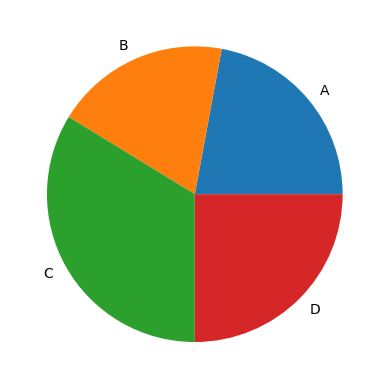

In [9]:
plt.pie(np.array(count), labels = ['A', 'B', 'C', 'D'])
plt.show() 

It seems that almost all the answers have a correct chance of 25%. Since this is a small dataset, it is reasonable. For large datasets, the correct chance will be equally divided among the answers.

We now plot the histogram to see the frequency of correct answers for each guessing strategy. Notice that the sum of the frequencies must be equal to **_24_**.

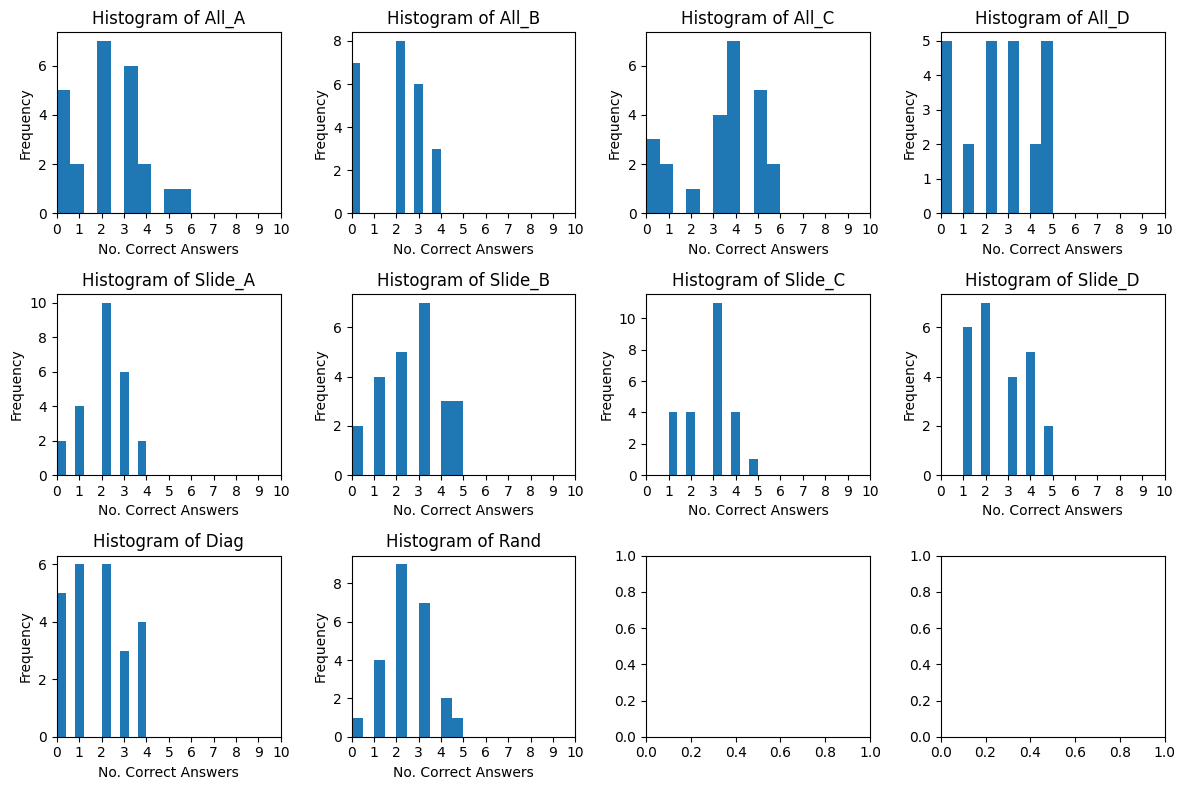

In [10]:
# Create the subplots
fig, axes = plt.subplots(3, 4, figsize = (12, 8))

# Flatten axes array to iterate over subplots
axes = axes.flatten()

# List all column names
columns = ['All_A', 'All_B', 'All_C', 'All_D',
           'Slide_A', 'Slide_B', 'Slide_C', 'Slide_D',
           'Diag', 'Rand']

for i, (ax, column) in enumerate(zip(axes, columns)):
    ax.hist(df[column], bins = 10)
    
    # Set labels and title
    ax.set_xlabel('No. Correct Answers')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

    # Set x-axis limits and ticks
    ax.set_xticks(range(11)) 
    ax.set_xlim(0, 10)

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

Something we can realize from all histograms:
- We can only get at most 6 out of 10 answers (60%) correct, and we can not go higher than that. 
- For all guessing strategies, we are most likely to get 2 to 3 out of 10 answers (20% - 30%) correct.
- In almost all guessing strategies, it seems the case where we do not get any correct answers, and even appears most in `ALL_D` strategy!

Now we consider the `Worst method` and the `Best method` columns. We count the appearance of each guessing strategy in these columns and plot it on the bar chart. Notice that the sum of all the counts for each chart equals **_24_**.

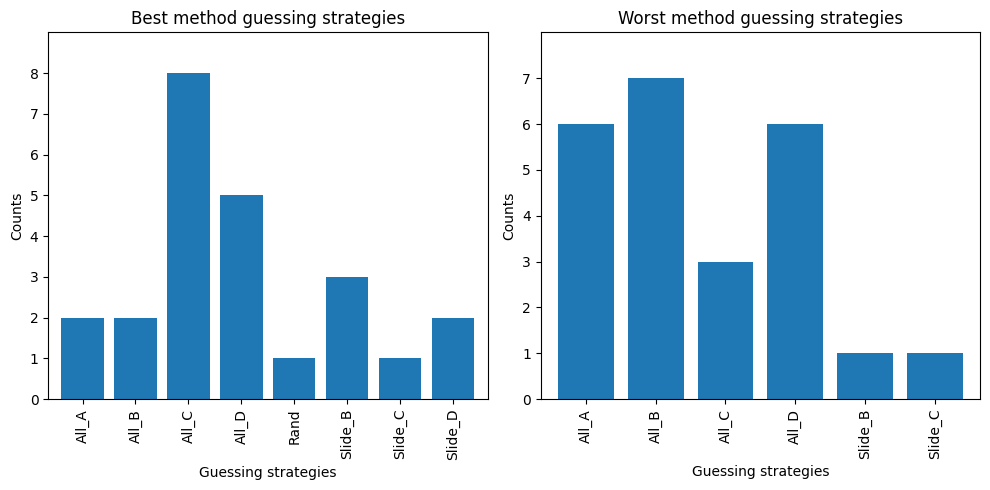

In [11]:
# Create the subplots
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

# List of column names
col_names = ['Best method', 'Worst method']

for i, column in enumerate(col_names):
    ax = axs[i] 
    grouped = df.groupby(column).size()
    grouped.plot(kind = 'bar', width = 0.8, ax = ax)

    # Set labels and title
    ax.set_xlabel('Guessing strategies')
    ax.set_ylabel('Counts')
    ax.set_title(f'{column} guessing strategies')

    # Set y-axis limits and ticks
    ax.set_ylim(0, max(grouped)+1)
    ax.set_yticks(range(0, max(grouped)+1, 1))

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

In our 4 guessing methods, it seems like choosing all the same answer or slide answer gives the best result compared to the other strategies.\
Let's crack down on what we can tell for each guessing strategy:
- **_All same answers_**: It appears that this strategy gives the best result. But in the same time, it appears to be mostly the worst strategy. This tells us that this method is good enough to be used. In some cases, it even gives a significantly bad result (`All_B` and `ALL_A`).
- **_Slide answers_**: This strategy produces the best result. Meanwhile, it appears some in the worst strategy. This tells us that this method is not too good to be used, however, it appears less in worst strategies than **_all same answers_**. We can fairly say that, this strategy is slightly better than **_all same answers_**.
- **_Diagonal answers_**: Surprisingly, this method does not appear in both charts. This tells us that this method is neither too good nor too bad to be used.
- **_Random answers_**: This method does not appear in the best guesing strategy. However, it takes part in the worst strategies. We can say that, this method might not be used.

# Conclusion
From the previous analysis, we can see that all guessing methods work differently, mostly based on the correct answer.\
 Another fact is that, the correct answer is distributed evenly among the 4 answers. Therefore, to achieve the highest result, the best way is to solve the problems instead of relying on lucky guesses. But if the problems are too difficult, it is totally up to your luck to play the guessing game :)).